# Project for UDA Assessment 4
## Author: 02179784 (Mark Roberts)

<B>Project Description:</B><BR>

This analysis has been, like this notebook, split into the following sections:
 - Benchmark the classification method using the original, unaltered colour images.
 - Standardize the image data.
 - Building the model
 - Determining accuracy of the model
 - Checking how accuracy of the model varies with image size.

Details of the dataset, taken from Kaggle, can be found here: [Pet Images](https://www.kaggle.com/datasets/chetankv/dogs-cats-images).<BR><BR>
It should be noted that only 4 of the 10 original monkey image categories have been used.  This is due to the limitations that have been placed on the dataset size (100MB).

Note that the category of monkey is given by the directory in which the picture is located (e.g. /n0).  The mapping from directories to monkey type is given here:

| Label | Latin Name | Common Name | Train Images | Validation Images |
| --- | --- | --- | --- | --- |
| n0 | alouatta_palliata | mantled_howler | 105 | 26 |
| n1 | erythrocebus_patas | patas_monkey | 111 | 28 |
| n2 | cacajao_calvus | bald_uakari | 110 | 27 |
| n3 | macaca_fuscata | japanese_macaque | 122 | 30 |

Further details of the project can be found in the PDF associated with the assessment.

    
<B>General Information:</B><BR>
 - This script was run on a Macbook Pro. with 32 GB of RAM.
 - The total run time of the Jupyter notebook was (approx) 120 seconds.
 - The Github repository for all code and datasets can be obtained by cloning the repository:
[GitHub-Repo](git@github.com:Mark12481632/UDA_Assessment_4_02179784_Roberts.git)
 - <B>The environment running the note book must allow for the creation of directories!!</B>

====
https://www.kaggle.com/datasets/chetankv/dogs-cats-images


In [22]:
# Import the libraries we will use:

import numpy as np
import os
import matplotlib.pyplot as plt

from PIL import Image
from skimage import io
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from skimage.transform import resize

In [16]:
# Common variables:

# Directory for dataset:
image_root_dir = "./pets"

training_dir = image_root_dir + "/training_set"
test_dir = image_root_dir + "/test_set"

# Restrict our analysis to following chess pieces:
pet_list = ["dogs", "cats"]

In [23]:
# Functions:

def image_as_np_vector(file, dim1=150, dim2=150):
    """
    """
    img_data = io.imread(file)
    img_data = io.resize(img_data, (dim1, dim2))
    vec = np.reshape(img_data, -1)
    return(vec)


def create_bw_photo(infile, outfile, height=150, width=150):
    """
    This 
    """
    img = Image.open(infile)

    img = img.convert("L").resize((height, width))
    bw_image = np.array(img.getdata(), dtype = np.uint8).reshape(height, width)

    io.imsave(outfile, bw_image)


def read_in_images(img_loc):
    """
    """
    data_list = []
    label_list = []
    for chess_piece in chess_pieces:
        image_files = os.listdir(img_loc + "/" + chess_piece)
        image_files.sort()

        for img_file in image_files:
            img_vec = image_as_np_vector(img_loc + "/" + chess_piece + "/" + img_file)
            data_list.append(img_vec)
            label_list.append(chess_piece)

    data = np.concatenate(data_list, axis=0).reshape(len(label_list),-1)
    labels = np.array(label_list)

    return((data, labels))

In [25]:
for pet in pet_list:
    full_test_dir = test_dir + "/" + pet
    files = os.listdir(full_test_dir)

    for file in files:
        full_in_file = full_test_dir + "/" + file
        full_out_file = full_test_dir + "/bw_" + file
        create_bw_photo(full_in_file, full_out_file)

In [15]:
!ls ./pets/training/dogs

ls: ./pets/training/dogs: No such file or directory


## Step 1
In order to get a basline metric on how well we can categorize the monkey images let's first see how well the
model can work on the original colour images of the monkeys.

The simplest classifier, that didn't involke Deep Learning, was the SGDClassifier.  This has 

In [38]:
# Read in images and label them, ready for training and validation:

# All chess pieces:
all_data, all_labels = read_in_images(image_root_dir)

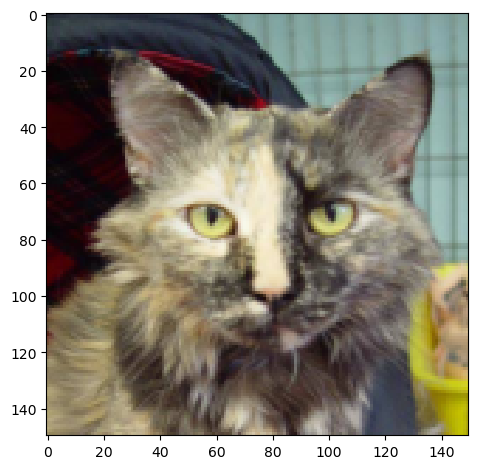

In [8]:
#io.imshow(all_data[0,:].reshape(150,150,3))

#io.imshow(io.imread("./pets/training_set/cats/cat.10.jpg"))
io.imshow(resize(io.imread("./pets/training_set/cats/cat.10.jpg"), (150,150)))

In [35]:
# Split into train & test datasets
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, test_size=0.33, random_state=1234)

# Model used is SGDClassifier (from sklearn).
sgd_clf = SGDClassifier(random_state=123, max_iter=5000, tol=1e-4)

# Train model
sgd_clf.fit(X_train, y_train)

# Now run against test dataset
predicted_labels = sgd_clf.predict(X_test)

print(len(predicted_labels))
print((predicted_labels==y_test).sum())

132
44


In [46]:
from keras.models import Sequential, Model 
from keras import layers

height = 200
width = 200
channels = 3

num_classes = 4

model = Sequential()
model.add(layers.SeparableConv2D(32, 2,
                                 activation='relu',
                                 input_shape=(height, width, channels,)))
model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))

model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.SeparableConv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))

model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.SeparableConv2D(128, 3, activation='relu'))
model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy')


## Step 2
In this step we will convert all coloured monkey photos:
 - into black & white photos
 - set to fixed size (150, 150)

This step took less than 20 seconds to complete.<BR><BR>
Kaggle provides two directories, one containing training monkey images and one containing test monkey images.

In [ ]:

for group in monkey_groups:
    # Process "training" dataset:
    # Create B&W output directory
    os.makedirs(dest_training_photos + group, exist_ok=True)
        
    # What are the colour photo files
    group_files = os.listdir(source_training_photos + group)
    print(f"DEBUG: Processing Group (Training): {group}, with {len(group_files)} files")

    in_dir = source_training_photos + group + "/"
    out_dir = dest_training_photos + group + "/"

    for file in group_files:
        create_bw_photo(in_dir + file, out_dir + file)


    # Process "validation" dataset:
    # Create B&W output directory
    os.makedirs(dest_validation_photos + group, exist_ok=True)

    # What are the colour photo files        
    group_files = os.listdir(source_validation_photos + group)
    print(f"DEBUG: Processing Group (Validation): {group}, with {len(group_files)} files")

    in_dir = source_validation_photos + group + "/"
    out_dir = dest_validation_photos + group + "/"

    for file in group_files:
        create_bw_photo(in_dir + file, out_dir + file)

In [ ]:
# Here we can see an example of a colour image of a monkey and the corresponding black & white image:
orig_img = io.imread(source_training_photos + "/n0/n0018.jpg")

# Show "standardized" version of same image.
new_img = io.imread(dest_training_photos + "/n0/n0018.jpg")

fig = plt.figure(figsize=(8, 5))
fig.suptitle('Corresponding Colour and Black & White Images of a Monkey')
ax_1 = fig.add_subplot(2,2,1)
io.imshow(orig_img)
ax_2 = fig.add_subplot(2,2,2)
io.imshow(new_img)


In [ ]:
# Consolidate BW images into labelled dataset:

np.random.seed(1234) # Ensure reproducable...

def image_as_np_vector(file):
    """
    """
    img_data = io.imread(file)
    vec = np.reshape(img_data, -1)
    return(vec)
    
# Train data:
data_list = []
label_list = []
for group in monkey_groups:
    group_files = os.listdir(dest_training_photos + group)
    for file in group_files:
        img_vec = image_as_np_vector(dest_training_photos + group + "/" + file)
        data_list.append(img_vec.tolist())
        label_list.append(group[1:]) # Remove preceeding '/'

# Shuffle data..
shuffle_index = np.random.choice(len(label_list), size=len(label_list), replace=False)

train_data = np.concatenate(data_list, axis=0)[shuffle_index]
train_labels = np.array(label_list)[shuffle_index]

print(len(train_data), train_data.shape, type(data_list[1]))
print(train_data[0:5])
print(train_labels[0:5])

"""
# Test data:
data_list = []
label_list = []
for group in monkey_groups:
    group_files = os.listdir(dest_validation_photos + group)
    for file in group_files:
        img_vec = image_as_np_vector(dest_validation_photos + group + "/" + file)
        data_list.append(img_vec)
        label_list.append(group[1:]) # Remove preceeding '/'

# Shuffle data..
shuffle_index = np.random.choice(len(label_list), size=len(label_list), replace=False)

test_data = np.concatenate(data_list, axis=0)[shuffle_index]
test_labels = np.array(label_list)[shuffle_index]

print(test_data[0:5, 0:5])
print(test_labels[0:5])
"""

In [ ]:
train_data.shape

## Step 2
In this step we need to create a model and train it.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(train_data, train_labels)

In [ ]:
predicted_labels = sgd_clf.predict(test_data)

print(len(predicted_labels))
print((predicted_labels==test_labels).sum())

In [ ]:
all_labels = ['n0', 'n1', 'n2', 'n3']

conf_mat = confusion_matrix(test_labels, predicted_labels)
print(conf_mat)

